<a href="https://colab.research.google.com/github/jblack333/ML-1/blob/main/Rios-Black_DS_HW2-2Question4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [353]:
%load_ext tensorboard
from tensorflow.keras import utils, callbacks, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Conv2D,MaxPooling2D,Flatten
import matplotlib.pyplot as plt
import numpy as np
import os, datetime

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [354]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

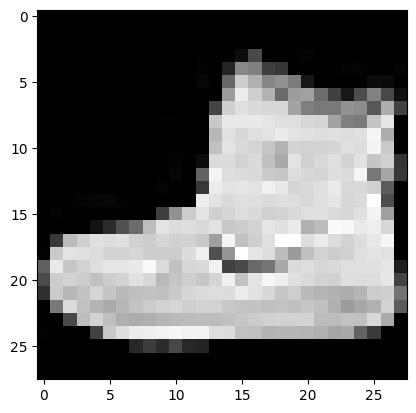

In [355]:
# show the first image in the data set
plt.imshow(X_train[0], cmap="gray") # Import the image
plt.show() # Plot the image

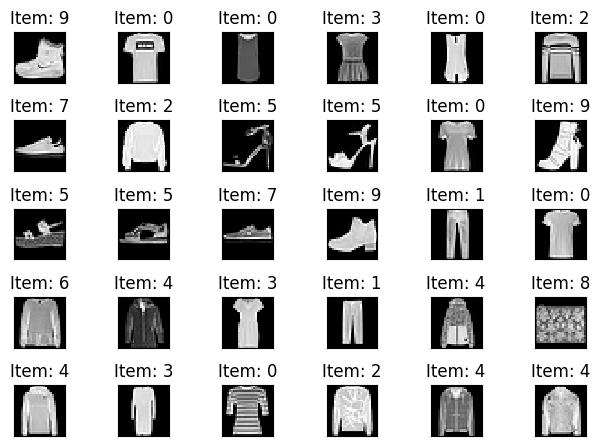

In [356]:
# show the first 25 images in the data set.
fig = plt.figure()
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Item: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [357]:
# Normalize the train dataset
X_train = utils.normalize(X_train, axis=1)
# Normalize the test dataset
X_test = utils.normalize(X_test, axis=1)

In [358]:
#Build the model object
model = Sequential()
# Add the Flatten Layer
model.add(Flatten())
# Build the input and the hidden layers
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
# Build the output layer
model.add(Dense(10, activation='softmax'))

In [359]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [360]:
# This is needed for loading Tensorboard.
tensorboard_callback = callbacks.TensorBoard(log_dir="logs", histogram_freq=1)

In [370]:
model.fit(x=X_train, y=y_train, epochs=15,
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback]) # Start training process

Epoch 1/15
1875/1875 [==============================] - 22s 11ms/step - loss: 0.1965 - accuracy: 0.9246 - val_loss: 0.3361 - val_accuracy: 0.8848
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1878 - accuracy: 0.9285 - val_loss: 0.3479 - val_accuracy: 0.8842
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1802 - accuracy: 0.9316 - val_loss: 0.3454 - val_accuracy: 0.8910
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1711 - accuracy: 0.9356 - val_loss: 0.3617 - val_accuracy: 0.8847
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1650 - accuracy: 0.9362 - val_loss: 0.3824 - val_accuracy: 0.8834
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1559 - accuracy: 0.9404 - val_loss: 0.3743 - val_accuracy: 0.8865
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1519 - accuracy: 0.9419 - val_loss: 0.3847 - val_a

In [371]:
model.summary()

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_23 (Flatten)        (None, 784)               0         
                                                                 
 dense_69 (Dense)            (None, 200)               157000    
                                                                 
 dense_70 (Dense)            (None, 200)               40200     
                                                                 
 dense_71 (Dense)            (None, 10)                2010      
                                                                 
Total params: 199210 (778.16 KB)
Trainable params: 199210 (778.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [372]:
# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=X_test, y=y_test, verbose=0)
# Print out the model accuracy
print('\nTest accuracy:', test_acc)



Test accuracy: 0.890500009059906


In [374]:
# Save model into MNIST.h5 and we are all done with the training now.
model.save('MNIST.h5')

In [375]:
model = models.load_model('MNIST.h5')

In [376]:
predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [377]:
# function that plots a single image.
def test_item(i):
    plt.imshow(X_test[i], interpolation='none')
    plt.title("item:%d   prediction: %d" %(y_test[i], np.argmax(predictions[i])))
    plt.xticks([])
    plt.yticks([])

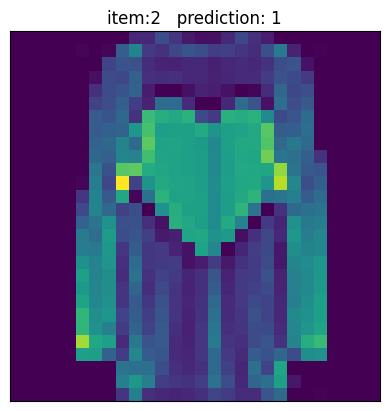

In [378]:
# let's output the images which were not predicted correctly.
for i in range(len(X_test)):
    if np.argmax(predictions[i]) != y_test[i]:
        test_item(i)

In [369]:
# For Question 4 the hidden layers AND the nuerons have been doubled compared to Q1. In addition, the Epochs have been bumped up by 50%. From 10 to 15.
# This has resulted in an accuaracy of 89%.